# Testing Notebook 03

This notebook is where I'm developing the containment methods for multivariate functions in $\mathbb{R}^n$

In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from statdepth.depth import banddepth, samplebanddepth
from statdepth.depth._containment import _is_in_simplex
from statdepth.depth.depth import _subsequences

First, create some multidimensional data

In [5]:
data = []
df1 = pd.DataFrame(np.random.randint(0,5,size=(30, 3)), columns=list('ABC'))
df2 = pd.DataFrame(np.random.randint(0,5,size=(30, 3)), columns=list('ABC'))
df3 = pd.DataFrame(np.random.randint(0,5,size=(30, 3)), columns=list('ABC'))
df4 = pd.DataFrame(np.random.randint(0,5,size=(30, 3)), columns=list('ABC'))

data = [df1, df2, df3, df4]


,A,B,C
0,3,4,4
1,0,0,0
2,0,2,0
3,2,3,3
4,4,2,1
5,1,3,3
6,4,3,0
7,2,4,0
8,3,4,4
9,4,2,1


In [19]:
from scipy.special import binom
def simplex_band_depth(data, curve, J=2):
    n, p = data[0].shape
    band_depth = 0
    
    # Generate subsequences 
    subseq = _subsequences(data[0].index, p)
        
    for sequence in subseq:
        band_depth += _is_in_simplex(simplex_points=[])

In [18]:
simplex_band_depth(data, df1)

TypeError: 'int' object is not iterable

In [93]:
from typing import List
from statdepth.depth.depth import _univariate_band_depth
from statdepth.depth._containment import _r2_containment

def _r2_enum_containment(data: List[pd.DataFrame], curve: pd.DataFrame, relax: bool) -> float:
    depths = pd.DataFrame()
    
    for i in range(0, len(data)):
        curve = data[i]
        c_depths = []
        
        for col in curve.columns:
            t = pd.DataFrame(index=data[0].index)

            for df, index in zip(data, [k for k in range(len(data))]):
                t[col + str(index)] = df[col]

            t['curve'] = curve[col]
            c_depths.append(_univariate_band_depth(data=t, curve='curve', relax=True, containment=_r2_containment))

        depths[i] = pd.Series(index=curve.columns, data=c_depths)
    return depths

In [97]:
%%timeit
s = _r2_enum_containment(data=data, curve=data[0], relax=False)

73.4 ms ± 833 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [73]:
depths = pd.DataFrame()

for i in range(0, len(data)):
    depths[i] = _r2_enum_containment(data=data, curve=data[i], relax=False)

depths

,0,1,2,3
A,0.456667,0.45,0.423333,0.460000
B,0.493333,0.45,0.463333,0.446667
C,0.510000,0.44,0.436667,0.493333


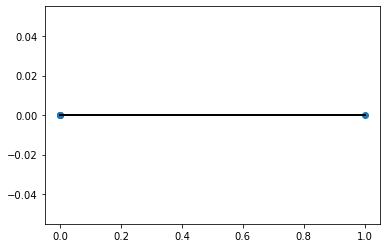

In [118]:
from scipy.spatial import ConvexHull, Delaunay
points = np.array([[0,0,1], [1,0,0], [0,0,0], [0,0,0]])

s = ConvexHull(points, qhull_options='QJ')

import matplotlib.pyplot as plt

plt.plot(points[:,0], points[:,1], 'o')

for simplex in s.simplices:

    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

In [114]:
def isinsimplex(points, point):
    s = ConvexHull(points, qhull_options='QJ', incremental=True) # allow degenerate simplex
    vert = s.vertices
    
    s.add_points([point])
    
    if len(vert) != len(s.vertices):
        return False
    
    return (all(vert == s.vertices))

isinsimplex(points, [.2, 0])

True

In [115]:
ConvexHull(points)

QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1126921403  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width  1  Error-roundoff 6.7e-16  _one-merge 3.4e-15
  _near-inside 1.7e-14  Visible-distance 1.3e-15  U-max-coplanar 1.3e-15
  Width-outside 2.7e-15  _wide-facet 8e-15  _maxoutside 4e-15

The input to qhull appears to be less than 2 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p2(v3):     0     0
- p1(v2):     1     0
- p0(v1):     0     0

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 6.7e-16.  The center point, facets and distances
to the center point are as follows:

center point   0.3333        0

facet p1 p0 distance=    0
facet p2 p0 distance= -0.24
facet p2 p1 distance=    0

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:         0         1  difference=    1
  1:         0         0  difference=    0

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 6.7e-16.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.
